# Load and visualize last positions of aircraft over a given zone with OpenSky live REST API (instant snapshot)

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import requests
import json
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

#### <br> Documentation is available here: https://opensky-network.org/apidoc/rest.html

#### *You can access to most recent state vectors as anonymous (unauthenticated) user*

In [3]:
lat_min, lat_max = 49.4, 51.6
lon_min, lon_max = 2.2, 6.7
tile_zoom = 8  # zoom of the map loaded by contextily
figsize = (15, 15)

#### <br> Load latest state vectors with OpenSky Network REST API

In [4]:
columns = [
    "icao24",
    "callsign",
    "origin_country",
    "time_position",
    "last_contact",
    "longitude",
    "latitude",
    "baro_altitude",
    "on_ground",
    "velocity",
    "true_track",
    "vertical_rate",
    "sensors",
    "geo_altitude",
    "squawk",
    "spi",
    "position_source",
]

In [5]:
def get_traffic_gdf():
    url_data = (
        f"https://@opensky-network.org/api/states/all?"
        f"lamin={str(lat_min)}"
        f"&lomin={str(lon_min)}"
        f"&lamax={str(lat_max)}"
        f"&lomax={str(lon_max)}"
    )
    json_dict = requests.get(url_data).json()
    df = pd.DataFrame(json_dict["states"], columns=columns)
    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df.longitude, df.latitude),
        crs={"init": "epsg:4326"},  # WGS84
    )
    return gdf

#### <br> Display traffic data as geopandas dataframe (with geometry column)

In [6]:
geo_df = get_traffic_gdf()
geo_df.head()

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,geometry
0,407a05,EZY79CZ,United Kingdom,1601993377,1601993378,6.3145,50.0633,10980.42,False,211.22,301.25,0.00,None,10942.32,3273,False,0,POINT (6.31450 50.06330)
1,4240e7,ABW143,United Kingdom,1601993378,1601993379,5.2398,50.6509,1912.62,False,142.95,355.46,5.20,None,1828.80,None,False,0,POINT (5.23980 50.65090)
2,49d3ce,TIE717J,Czech Republic,1601993379,1601993379,2.6606,49.8756,12496.80,False,200.38,320.83,0.00,None,12550.14,5766,False,0,POINT (2.66060 49.87560)
3,44819b,SUPP108,Belgium,1601993237,1601993237,4.4642,50.9049,NaN,True,5.40,281.25,NaN,None,NaN,None,False,0,POINT (4.46420 50.90490)
4,a09db2,N139LZ,United States,1601993378,1601993378,5.8787,51.4815,838.20,False,103.84,31.01,4.88,None,777.24,7000,False,0,POINT (5.87870 51.48150)


#### <br> Plot data on a map

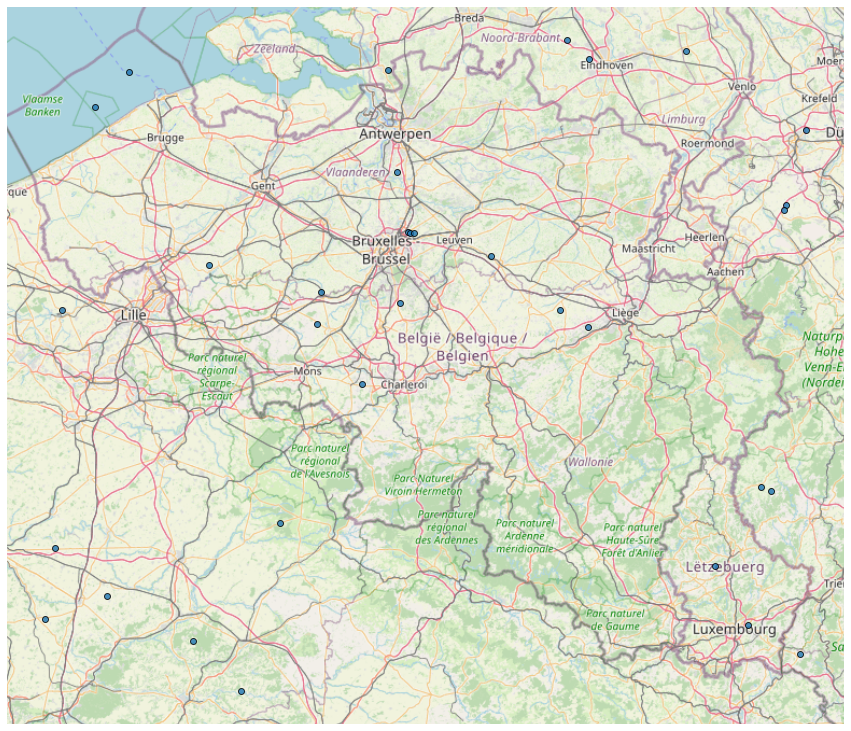

In [7]:
gdf_3857 = geo_df.to_crs(epsg=3857)  # web mercator
f, ax = plt.subplots(figsize=figsize)
gdf_3857.plot(ax=ax, alpha=0.8, edgecolor="k")
ctx.add_basemap(ax, zoom=tile_zoom, url=ctx.sources.OSM_A)
ax.set_axis_off()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("instant_traffic.png", bbox_inches="tight", pad_inches=-0.1)